## Linear Regression from scratch

The goal of this exercise is to implement the linear regression algorithm. 
The dataset is about predicting salary given gpa and years of experience. 
The steps to implement are as follows.  

1.	Read the data from a file (gpa_year_experience.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in vector
4.	Plot the error vector as a curve in the end
5.	Predict a new instance.
6.  Compare with SGDRegressor
7.  Create polynomial features and predict new instance   

In [510]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [511]:
# load data and show first 5 rows
data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/gpa_years_experience.csv')
data.head()

,gpa,years_of_experience,salary
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [512]:
# prepare data, split columns into X and y
# X should be a numpy array of shape (m, n), use .values to convert from dataframe to numpy array
# y should be a numpy array of shape (m,), use .values to convert from dataframe to numpy array

X = data.values
y = data['gpa'].values
y

array([70, 80, 65, 70, 65, 80, 90, 92, 60, 70, 76, 85, 80, 60, 64, 60, 87,
       90, 75, 80, 75, 70, 80, 90, 85])

In [513]:
# extract m and n from X using X.shape[0] to get m and X.shape[1] to get n
m = X.shape[0]
n = X.shape[1]
m,n

(25, 3)

In [514]:
# y should be a numpy array of shape (m, 1), use reshape(m, 1) to reshape y from (m,) to (m, 1)
y.reshape(m, 1)

array([[70],
       [80],
       [65],
       [70],
       [65],
       [80],
       [90],
       [92],
       [60],
       [70],
       [76],
       [85],
       [80],
       [60],
       [64],
       [60],
       [87],
       [90],
       [75],
       [80],
       [75],
       [70],
       [80],
       [90],
       [85]])

In [515]:
# normalize X using min-max scaler (sklearn.preprocessing.MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [516]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature
#X = add_dummy_feature(X)
X_b = add_dummy_feature(X)
X_b

array([[1.        , 0.3125    , 0.        , 0.11111111],
       [1.        , 0.625     , 0.125     , 0.22222222],
       [1.        , 0.15625   , 0.125     , 0.        ],
       [1.        , 0.3125    , 0.1875    , 0.33333333],
       [1.        , 0.15625   , 0.2125    , 0.28888889],
       [1.        , 0.625     , 0.25      , 0.33333333],
       [1.        , 0.9375    , 0.25      , 0.44444444],
       [1.        , 1.        , 0.275     , 0.48888889],
       [1.        , 0.        , 0.3125    , 0.22222222],
       [1.        , 0.3125    , 0.3375    , 0.33333333],
       [1.        , 0.5       , 0.375     , 0.44444444],
       [1.        , 0.78125   , 0.4375    , 0.55555556],
       [1.        , 0.625     , 0.5       , 0.73333333],
       [1.        , 0.        , 0.5625    , 0.66666667],
       [1.        , 0.125     , 0.6       , 0.73333333],
       [1.        , 0.        , 0.625     , 0.55555556],
       [1.        , 0.84375   , 0.625     , 0.77777778],
       [1.        , 0.9375    ,

In [517]:
# print shapes of X and y
# X should be (m, n+1) and y should be (m, 1)
print(X.shape, y.shape)

(25, 3) (25,)


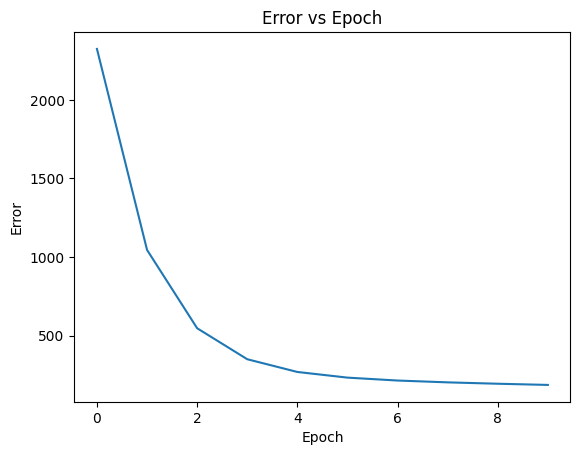

[[40.44096669 46.26062829 37.53113589 40.44096669 37.53113589 46.26062829
  52.08028989 53.24422221 34.62130509 40.44096669 43.93276365 49.17045909
  46.26062829 34.62130509 36.94916973 34.62130509 50.33439141 52.08028989
  43.35079749 46.26062829 43.35079749 40.44096669 46.26062829 52.08028989
  49.17045909]
 [15.72935558 18.05233969 14.56786353 15.72935558 14.56786353 18.05233969
  20.3753238  20.83992062 13.40637148 15.72935558 17.12314605 19.21383174
  18.05233969 13.40637148 14.33556512 13.40637148 19.67842856 20.3753238
  16.89084764 18.05233969 16.89084764 15.72935558 18.05233969 20.3753238
  19.21383174]
 [15.82562582 18.07662758 14.70012495 15.82562582 14.70012495 18.07662758
  20.32762933 20.77782969 13.57462407 15.82562582 17.17622688 19.20212846
  18.07662758 13.57462407 14.47502477 13.57462407 19.65232881 20.32762933
  16.9511267  18.07662758 16.9511267  15.82562582 18.07662758 20.32762933
  19.20212846]
 [18.86809357 21.4329258  17.58567746 18.86809357 17.58567746 21.4329

In [518]:
eta = 0.1 # learning rate
n_epochs = 10
np.random.seed(42) # set random seed to 42 for reproducibility

# create theta, of shape (n+1, 1) and initialize it to random values using np.random.randn
theta = np.random.randn(n+1, 1)

E = [] # list to store errors at each epoch
# compute error for initial theta and append to E


# loop over n_epochs
# for each epoch: compute gradients, update theta, compute error, append error to E
for epoch in range(n_epochs):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    E.append(np.mean((X_b.dot(theta) - y) ** 2))

# plot error vs epoch
plt.plot(E)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs Epoch')
plt.show()

# print final theta
print(theta)

In [519]:
# let's predict the salary for a person who has gpa=70 and years_of_experience=3. 
# create a numpy array x of shape (1, 2) with these values
# scale features using the same scaler we used earlier
# insert dummy feature using dummy feature function
# Predict salary of x
x = np.array([[70,3]])
x = scaler.fit_transform(x)
x_b = add_dummy_feature(x)
theta_best = np.linalg.inv(X.T @ X) @ X.T @ y
theta_best
y_pred = x_b @ theta_best
y_pred

array([58.74318811])

In [520]:
# Let's compare with scikit-learn's SGDRegressor
# use SGDRegressor from scikit-learn to fit the data
# use max_iter=1000, eta0=0.1, random_state=42
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.1, random_state=42)
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, random_state=42)

In [521]:
# predict salary of x using sgd
predicted_salary = sgd_reg.predict(x_b)
predicted_salary

array([90.83230711])

In [522]:
# create polynomial features of degree 2 using scikit-learn PolynomialFeatures
# create X_poly using fit_transform
# create x_poly using transform
# fit the data using SGDRegressor
# predict salary of x using sgd
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
x_poly = poly_features.transform(x_b)
sgd_reg.fit(X_poly, y)
predicted_salary = sgd_reg.predict(x_poly)
predicted_salary

array([89.88445645])